In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [8]:
# Values and file operations as given in Makedataset.py

time = 10 # we perform sampling for 10s
offset = 100 # we selct samples from 100th position of csv file
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"] #name of activity folders
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined") # Store path to Combined folder containing Train and Test Datasets.

In [9]:
# Now we obtain train datasets to perform EDA.

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train") # obtaining path to Train dataset

for folder in folders: # for each activity folder in Train
    files = os.listdir(os.path.join(dataset_dir,folder)) # we obtain a list of csv files in each activity folder

    for file in files: # for each subject csv file in the activity folder

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0) # we store its data in Dataframe df.
        df = df[offset:offset+time*50] # we store on 500 records starting from 100 to 600
        X_train.append(df.values) # we append values to X_train 
        y_train.append(classes[folder]) # # we append values to y_train 

# we convert the data series to numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train)

# We already had X_train, y_train, now we obtain X_test, y_test as well as validation set from remaining MakeDataset.py

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

from sklearn.model_selection import train_test_split

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=seed)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
# print("Validation data shape: ",X_val.shape)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [10]:
X_train

array([[[ 1.007544  , -0.1637979 , -0.1496132 ],
        [ 1.009979  , -0.161686  , -0.1536227 ],
        [ 1.01008   , -0.160879  , -0.1589772 ],
        ...,
        [ 1.002052  , -0.1727968 , -0.1738661 ],
        [ 1.002875  , -0.1738667 , -0.1729062 ],
        [ 1.001078  , -0.1738621 , -0.1744945 ]],

       [[ 0.9100345 , -0.09837841,  0.2526748 ],
        [ 0.8547794 , -0.1036736 ,  0.2466994 ],
        [ 0.8448371 , -0.1162746 ,  0.233289  ],
        ...,
        [ 0.385755  , -0.258573  ,  0.1717271 ],
        [ 0.5271969 , -0.2313261 ,  0.1711758 ],
        [ 0.5528433 , -0.2209706 ,  0.1948508 ]],

       [[ 1.015056  , -0.03396467,  0.1354992 ],
        [ 1.011082  , -0.0325952 ,  0.1431367 ],
        [ 1.014167  , -0.03133387,  0.1503816 ],
        ...,
        [ 1.012933  , -0.03234481,  0.1501941 ],
        [ 1.012485  , -0.03568829,  0.1518454 ],
        [ 1.011004  , -0.03656625,  0.1570806 ]],

       ...,

       [[ 0.0365117 ,  0.7822584 ,  0.6494456 ],
        [ 0

In [11]:
X_train.shape # 126 windows with each having 500 rows and 3 columns

(126, 500, 3)

In [12]:
y_train 

array([5, 3, 5, 1, 5, 4, 1, 3, 2, 1, 4, 3, 4, 3, 1, 5, 6, 6, 4, 2, 6, 4,
       3, 6, 3, 6, 2, 6, 6, 4, 1, 1, 5, 2, 4, 4, 4, 4, 4, 4, 5, 1, 1, 3,
       4, 2, 3, 6, 2, 3, 5, 3, 4, 3, 5, 1, 4, 5, 4, 4, 5, 2, 2, 2, 2, 5,
       6, 3, 6, 3, 5, 4, 1, 1, 4, 6, 2, 3, 1, 1, 3, 3, 6, 6, 5, 1, 6, 6,
       1, 1, 6, 5, 3, 1, 5, 2, 5, 2, 5, 5, 3, 4, 5, 2, 6, 4, 1, 3, 6, 5,
       5, 6, 5, 3, 3, 2, 3, 1, 2, 2, 6, 1, 2, 6, 3, 3])

In [13]:
y_train.shape # contain activity code for each window 

(126,)

In [14]:
activity_dictionary={1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

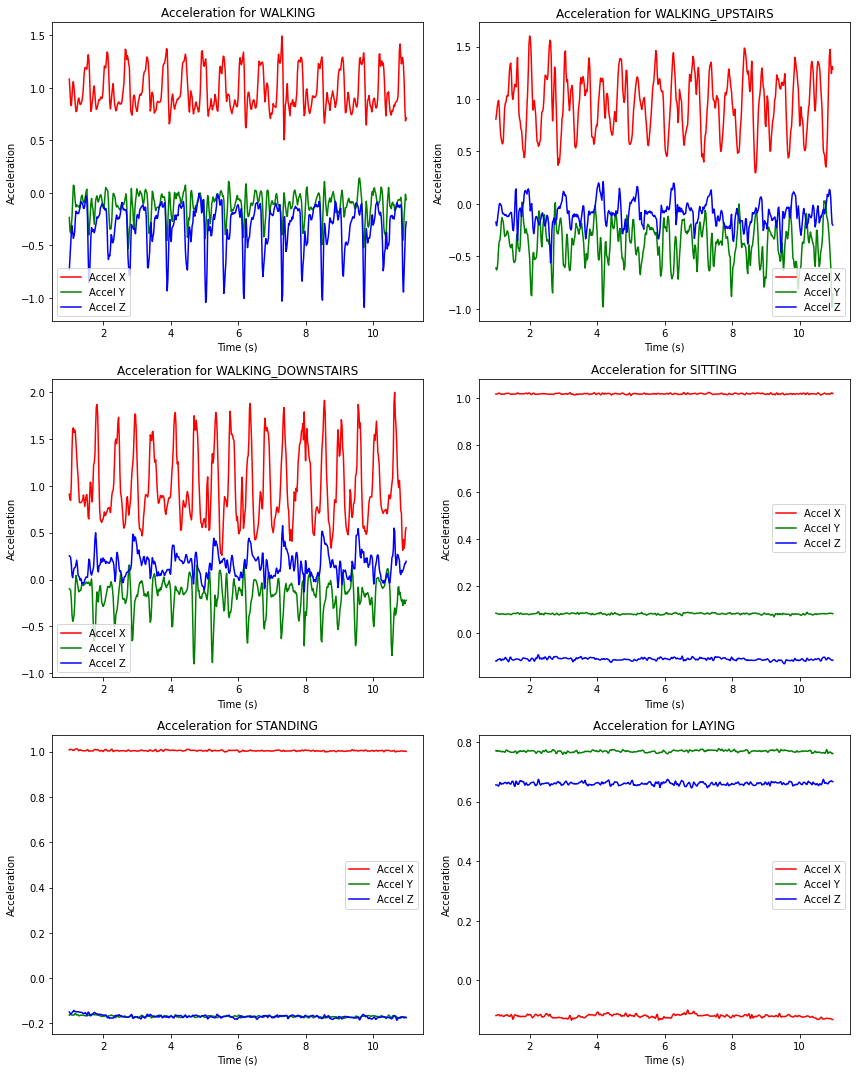

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for act_code in activity_dictionary.keys():
    matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
    if matching_indices.size > 0:
    
        window_index=matching_indices[0]
        X_train_window=X_train[window_index,:,:]
        accel_x=X_train_window[:,0]
        accel_y=X_train_window[:,1]
        accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
        x=np.arange(1,11,0.02)#considering 1st 10s with sampling frequency of 50Hz
        ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
        ax.plot(x, accel_x, label='Accel X', color='r')
        ax.plot(x, accel_y, label='Accel Y', color='g')
        ax.plot(x, accel_z, label='Accel Z', color='b')
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Acceleration")
        ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        ax.legend()
    else:
        print("true")
        
plt.tight_layout()
plt.show()


### q2

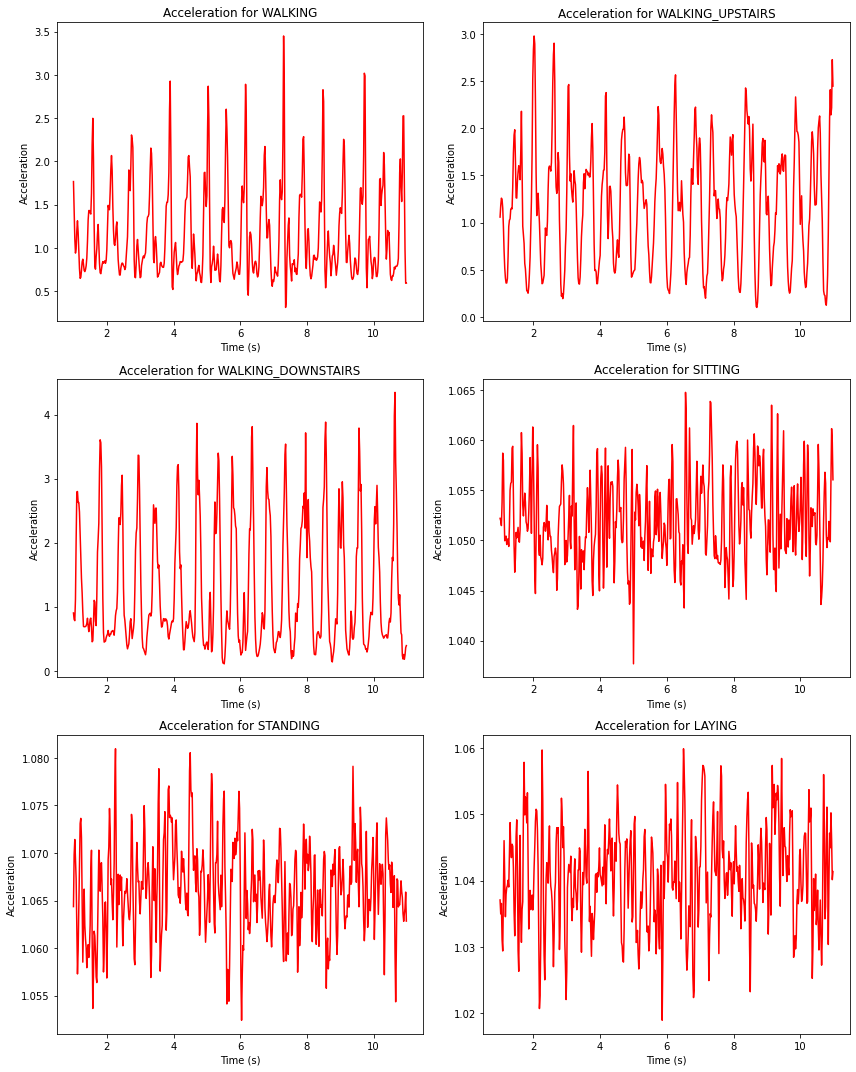

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()
for act_code in activity_dictionary.keys():
        matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
        if matching_indices.size > 0:

            window_index=matching_indices[0]
            X_train_window=X_train[window_index,:,:]
            accel_x=X_train_window[:,0]
            accel_y=X_train_window[:,1]
            accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
            accel_net_sqr = accel_x**2 + accel_y**2 +accel_z**2
            x=np.arange(1,11,0.02)#considering 1st 10s with sampling frequency of 50Hz
            ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
            ax.plot(x, accel_net_sqr, color='r')
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Acceleration")
            ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        else:
            print("true")

plt.tight_layout()
plt.show()


## q3

In [17]:
X_train.shape

(126, 500, 3)

In [18]:
total_accel=np.sum(X_train**2,axis=2)#sum along third dim 3 i.e.of columns
from sklearn.preprocessing import StandardScaler # we can also use min_max_scaler for standardization
scaler=StandardScaler()
scaler.fit(total_accel)
scaled_data=scaler.transform(total_accel)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

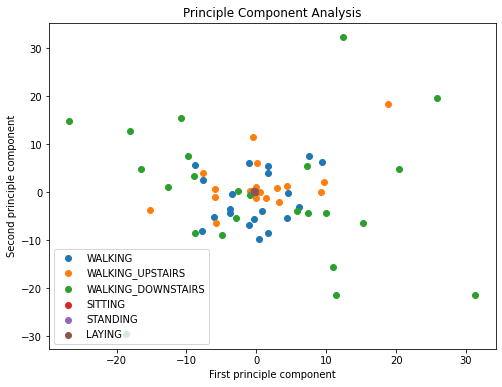

In [19]:
plt.figure(figsize=(8,6))

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train==act_code)
    plt.scatter(x_pca[rows,0],x_pca[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 120)


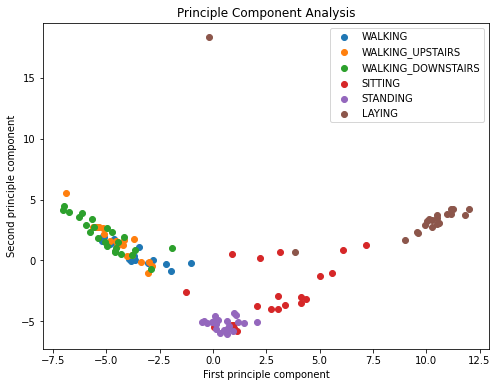

(126, 120)
(126,)


In [20]:
import tsfel
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_tsfel_features_list = []

# Loop through each window in X_train
for i in range(X_train.shape[0]):
    # Flatten the current window and create a DataFrame
    train_data_for_tsfel = pd.DataFrame({
        'x_comp': X_train[i, :, 0],
        'y_comp': X_train[i, :, 1],
        'z_comp': X_train[i, :, 2]
    })

    # Get TSFEL configuration for statistical features
    cfg = tsfel.get_features_by_domain('statistical')

    # Extract features for the current window
    train_features = tsfel.time_series_features_extractor(cfg, train_data_for_tsfel, fs=50)
    
    # Append the extracted features to the list
    train_tsfel_features_list.append(train_features)

# Combine the features from all windows into a single DataFrame
train_tsfel_features_df = pd.concat(train_tsfel_features_list, ignore_index=True)

# Standardize the features
scaler = StandardScaler()
train_standardized_tsfel_features = scaler.fit_transform(train_tsfel_features_df)

# Display the shape of standardized features
print(train_standardized_tsfel_features.shape)

# Proceed with PCA or any other analysis as needed
from sklearn.decomposition import PCA
pca_tsfel=PCA(n_components=2)
pca_tsfel.fit(train_standardized_tsfel_features)
x_pca_tsfel=pca_tsfel.transform(train_standardized_tsfel_features)
plt.figure(figsize=(8,6))

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train==act_code)
    plt.scatter(x_pca_tsfel[rows,0],x_pca_tsfel[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()
print(train_standardized_tsfel_features.shape)
print(y_train.shape)

## 1 q3 c

In [21]:
X_train_data_path = "./UCI HAR Dataset/train/X_train.csv" 
X_train_dataset = pd.read_csv(X_train_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_train_dataset.shape[1]:
    X_train_dataset.columns = feature_names
y_train_data_path="./UCI HAR Dataset/train/y_train.csv"
y_train_dataset = pd.read_csv(y_train_data_path, header=None)
y_train_dataset.columns = ['Activity']


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_data = scaler.fit_transform(X_train_dataset)

print(f"Scaled data shape: {scaled_X_data.shape}")

Scaled data shape: (7352, 561)


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(scaled_X_data)

print(f"PCA-transformed data shape: {X_data_pca.shape}")

PCA-transformed data shape: (7352, 2)


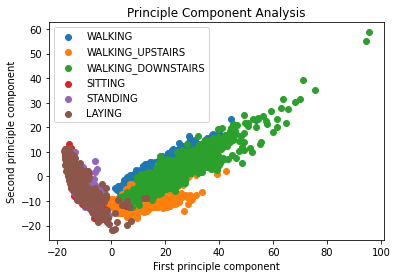

In [24]:
activity_dictionary={1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train_dataset==act_code)
    plt.scatter(X_data_pca[rows,0],X_data_pca[rows,1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()

### q4

In [25]:
tsfel_df=pd.DataFrame(train_standardized_tsfel_features)

tsfel_corr_matr=pd.DataFrame(tsfel_df.corr())

tsfel_corr_matr.head()



,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.000000,1.000000,NaN,NaN,0.858881,0.971082,NaN,NaN,NaN,NaN,...,-0.658687,0.421560,-0.664966,0.401868,-0.634877,0.472007,-0.827730,-0.014828,0.434814,0.248175
1,1.000000,1.000000,NaN,NaN,0.858881,0.971082,NaN,NaN,NaN,NaN,...,-0.658687,0.421560,-0.664966,0.401868,-0.634877,0.472007,-0.827730,-0.014828,0.434814,0.248175
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.858881,0.858881,NaN,NaN,1.000000,0.798627,NaN,NaN,NaN,NaN,...,-0.511350,0.065955,-0.517735,0.024188,-0.364541,0.094344,-0.760991,0.005160,0.075831,-0.046676


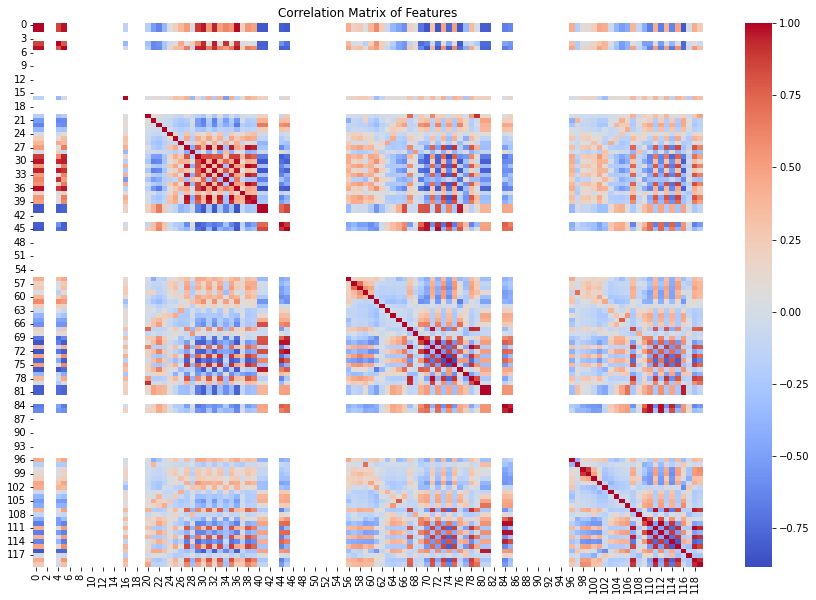

In [26]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(tsfel_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [27]:
dataset_df=pd.DataFrame(scaled_X_data,columns=feature_names)

dataset_corr_matr=pd.DataFrame(dataset_df.corr())

dataset_corr_matr.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169


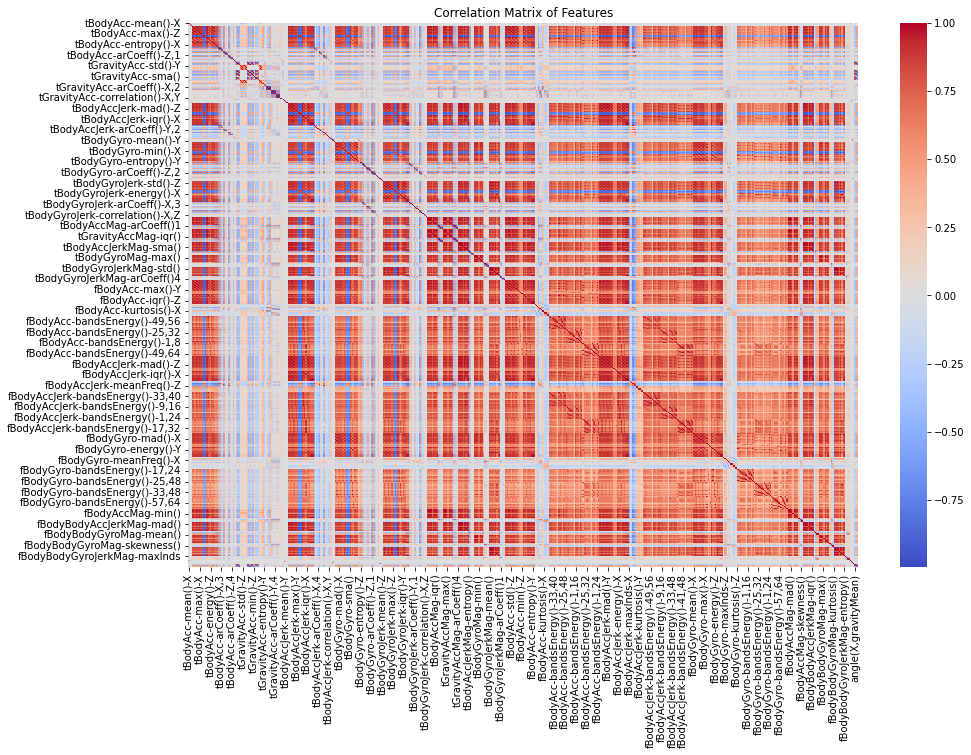

In [28]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(dataset_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Task 2

In [29]:
# # We already had X_train, y_train, now we obtain X_test, y_test as well as validation set from remaining MakeDataset.py

# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#                                                 # Test Dataset
# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# X_test=[]
# y_test=[]
# dataset_dir = os.path.join(combined_dir,"Test")

# for folder in folders:
#     files = os.listdir(os.path.join(dataset_dir,folder))
#     for file in files:

#         df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
#         df = df[offset:offset+time*50]
#         X_test.append(df.values)
#         y_test.append(classes[folder])

# X_test = np.array(X_test)
# y_test = np.array(y_test)

# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#                                                 # Final Dataset
# #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# # USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# # concatenate the training and testing data
# X = np.concatenate((X_train,X_test))
# y = np.concatenate((y_train,y_test))

# from sklearn.model_selection import train_test_split

# seed = 42
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=seed)

# print("Training data shape: ",X_train.shape)
# print("Testing data shape: ",X_test.shape)
# print("Validation data shape: ",X_val.shape)

In [30]:
X_train

array([[[ 1.007544  , -0.1637979 , -0.1496132 ],
        [ 1.009979  , -0.161686  , -0.1536227 ],
        [ 1.01008   , -0.160879  , -0.1589772 ],
        ...,
        [ 1.002052  , -0.1727968 , -0.1738661 ],
        [ 1.002875  , -0.1738667 , -0.1729062 ],
        [ 1.001078  , -0.1738621 , -0.1744945 ]],

       [[ 0.9100345 , -0.09837841,  0.2526748 ],
        [ 0.8547794 , -0.1036736 ,  0.2466994 ],
        [ 0.8448371 , -0.1162746 ,  0.233289  ],
        ...,
        [ 0.385755  , -0.258573  ,  0.1717271 ],
        [ 0.5271969 , -0.2313261 ,  0.1711758 ],
        [ 0.5528433 , -0.2209706 ,  0.1948508 ]],

       [[ 1.015056  , -0.03396467,  0.1354992 ],
        [ 1.011082  , -0.0325952 ,  0.1431367 ],
        [ 1.014167  , -0.03133387,  0.1503816 ],
        ...,
        [ 1.012933  , -0.03234481,  0.1501941 ],
        [ 1.012485  , -0.03568829,  0.1518454 ],
        [ 1.011004  , -0.03656625,  0.1570806 ]],

       ...,

       [[ 0.0365117 ,  0.7822584 ,  0.6494456 ],
        [ 0

### q1 a.

In [31]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier(random_state=seed)

In [32]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [33]:
# # flattenning X_train, X_test and X_val from 3D to 2D
# X_train_flat=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
# X_test_flat=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
# # X_val_flat=X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])

# dec_tree.fit(X_train_flat,y_train)

In [34]:
#ok-final
X_train_for_dt = X_train.reshape(X_train.shape[1]*X_train.shape[0],X_train.shape[2])
y_train_for_dt = np.repeat(y_train, 500)
extended_y_train_for_dt = y_train_for_dt.reshape(-1, 1)
train_result_dt = np.hstack((X_train_for_dt, extended_y_train_for_dt))
print(train_result_dt.shape)

X_test_for_dt = X_test.reshape(X_test.shape[1]*X_test.shape[0],X_test.shape[2])
y_test_for_dt = np.repeat(y_test, 500)
extended_y_test_for_dt = y_test_for_dt.reshape(-1, 1)
test_result_dt = np.hstack((X_test_for_dt, extended_y_test_for_dt))
print(test_result_dt.shape)

dec_tree.fit(X_train_for_dt,y_train_for_dt)

(63000, 4)
(27000, 4)


DecisionTreeClassifier(random_state=42)

In [35]:
# print(X_train_flat.shape)

In [36]:
#r
print(X_train_for_dt.shape)

(63000, 3)


In [37]:
y_predicted_from_dt = dec_tree.predict(X_test_for_dt)

In [38]:
#now we have outputs from predictions. now we compare for various metrics.

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [40]:
# accuracy=accuracy_score(y_test,y_pred)
# recall=recall_score(y_test,y_pred, average='weighted')
# precision=precision_score(y_test,y_pred, average='weighted')#multiclass data
# confusion_matrix=confusion_matrix(y_test,y_pred)

# print(f"Accuracy : {accuracy}")
# print(f"Recall : {recall}")
# print(f"Precision : {precision}")
# print(f"Confusion Matrix : \n{confusion_matrix}")

In [41]:
#r
print(y_pred)
accuracy=accuracy_score(extended_y_test_for_dt,y_predicted_from_dt)
recall=recall_score(extended_y_test_for_dt,y_predicted_from_dt, average='weighted')
precision=precision_score(extended_y_test_for_dt,y_predicted_from_dt, average='weighted')#multiclass data
confusion_matrix=confusion_matrix(extended_y_test_for_dt,y_predicted_from_dt)

print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"Confusion Matrix : \n{confusion_matrix}")

NameError: name 'y_pred' is not defined

## q1 b

In [ ]:
test_tsfel_features_list = []

# Loop through each window in X_train
for i in range(X_test.shape[0]):
    # Flatten the current window and create a DataFrame
    test_data_for_tsfel = pd.DataFrame({
        'x_comp': X_test[i, :, 0],
        'y_comp': X_test[i, :, 1],
        'z_comp': X_test[i, :, 2]
    })

    # Get TSFEL configuration for statistical features
    cfg = tsfel.get_features_by_domain('statistical')

    # Extract features for the current window
    test_features = tsfel.time_series_features_extractor(cfg, test_data_for_tsfel, fs=50)
    
    # Append the extracted features to the list
    test_tsfel_features_list.append(test_features)

# Combine the features from all windows into a single DataFrame
test_tsfel_features_df = pd.concat(test_tsfel_features_list, ignore_index=True)

# Standardize the features
scaler = StandardScaler()
test_standardized_tsfel_features = scaler.fit_transform(test_tsfel_features_df)

# Display the shape of standardized features
print(test_standardized_tsfel_features.shape)

In [ ]:
train_standardized_tsfel_features.shape

In [ ]:
y_train_val.shape

In [ ]:
test_standardized_tsfel_features.shape

In [ ]:
y_test.shape

In [ ]:
X_tsfel = np.concatenate((train_standardized_tsfel_features,test_standardized_tsfel_features))
y_tsfel = np.concatenate((y_train_val,y_test))
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(X_tsfel, y, test_size=0.3, random_state=seed,stratify=y)
# X_train_tsfel, X_val_tsfel, y_train_tsfel, y_val_tsfel = train_test_split(X_train_val_tsfel, y_train_val_tsfel, test_size=0.3, random_state=seed)


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
print("Unique values in y_train_tsfel:", np.unique(y_train_tsfel))
print("Unique values in y_test_tsfel:", np.unique(y_test_tsfel))
print("X_train_tsfel shape:", X_train_tsfel.shape)
print("y_train_tsfel shape:", y_train_tsfel.shape)
print("X_test_tsfel shape:", X_test_tsfel.shape)
print("y_test_tsfel shape:", y_test_tsfel.shape)


In [ ]:
dec_tree.fit(X_train_tsfel, y_train_tsfel)

In [ ]:
y_pred_tsfel=dec_tree.predict(X_test_tsfel)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy_tsfel=accuracy_score(y_test_tsfel,y_pred_tsfel)
recall_tsfel=recall_score(y_test_tsfel,y_pred_tsfel, average='weighted')
precision_tsfel=precision_score(y_test_tsfel,y_pred_tsfel, average='weighted')#multiclass data
confusion_matrix_tsfel=confusion_matrix(y_test_tsfel,y_pred_tsfel)

print(f"Accuracy : {accuracy_tsfel}")
print(f"Recall : {recall_tsfel}")
print(f"Precision : {precision_tsfel}")
print(f"Confusion Matrix : \n{confusion_matrix_tsfel}")

### q1 c

In [ ]:
# we have extracted x_train_dataset,and y_train_dataset. now test

In [ ]:
X_test_data_path = "./UCI HAR Dataset/test/X_test.csv" 
X_test_dataset = pd.read_csv(X_test_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_test_dataset.shape[1]:
    X_test_dataset.columns = feature_names
y_test_data_path="./UCI HAR Dataset/test/y_test.csv"
y_test_dataset = pd.read_csv(y_test_data_path, header=None)
y_test_dataset.columns = ['Activity']


In [ ]:
X_dataset = np.concatenate((X_train_dataset,X_test_dataset))
y_dataset = np.concatenate((y_train_dataset,y_test_dataset))

from sklearn.model_selection import train_test_split

X_dataset_train, X_dataset_test,y_dataset_train,y_dataset_test=train_test_split(X_dataset,y_dataset, test_size=0.3,random_state=seed)
# X_dataset_train, X_dataset_val,y_dataset_train,y_dataset_val=train_test_split(X_dataset_train_val,y_dataset_train_val, test_size=0.3,random_state=seed)

In [ ]:
dec_tree.fit(X_dataset_train, y_dataset_train)

In [ ]:
y_dataset_pred=dec_tree.predict(X_dataset_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy_dataset=accuracy_score(y_dataset_test,y_dataset_pred)
recall_dataset=recall_score(y_dataset_test,y_dataset_pred, average='weighted')
precision_dataset=precision_score(y_dataset_test,y_dataset_pred, average='weighted')#multiclass data
confusion_matrix_dataset=confusion_matrix(y_dataset_test,y_dataset_pred)

print(f"Accuracy : {accuracy_dataset}")
print(f"Recall : {recall_dataset}")
print(f"Precision : {precision_dataset}")
print(f"Confusion Matrix : \n{confusion_matrix_dataset}")

## Q2

In [ ]:
depth_list=range(2,9)
accuracy_list1=[]
accuracy_list2=[]
accuracy_list3=[]

for d in depth_list:
    
    dtc1=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc2=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc3=DecisionTreeClassifier(max_depth=d,random_state=42)
    
    dtc1.fit(X_train_flat,y_train)
    y_pred_for_1=dtc1.predict(X_test_flat)
    acc_1=accuracy_score(y_test,y_pred_for_1)

    dtc2.fit(X_train_tsfel, y_train_tsfel)
    y_pred_for_2=dtc2.predict(X_test_tsfel)
    acc_2=accuracy_score(y_test_tsfel,y_pred_for_2)

    dtc3.fit(X_dataset_train, y_dataset_train)
    y_pred_for_3=dtc3.predict(X_dataset_test)
    acc_3=accuracy_score(y_dataset_test,y_pred_for_3)
    
    accuracy_list1.append(acc_1)
    accuracy_list2.append(acc_2)
    accuracy_list3.append(acc_3)
    
print(depth_list)
print(accuracy_list1)
print(accuracy_list2)
print(accuracy_list3)

plt.figure(figsize=(8,6))

plt.plot(depth_list,accuracy_list1,marker="o",label="From raw data")
plt.plot(depth_list,accuracy_list2,marker="o",color="Green",label="From TSFEL")
plt.plot(depth_list,accuracy_list3,marker="o",color="Red",label="From given dataset")

plt.xlabel("Depths")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

q3

##Task3: Prompt Engineering for Large Language Models (LLMs) 

q1

In [ ]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq
import creds

In [ ]:
# Groq API and Models 
Groq_Token = {creds.api_key}  # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [ ]:
#ok-final
X_train_for_llm = X_train.reshape(X_train.shape[1]*X_train.shape[0],X_train.shape[2])
y_train_for_llm = np.repeat(y_train, 500)
extended_y_train_for_llm = y_train_for_llm.reshape(-1, 1)
train_result = np.hstack((X_train_for_llm, extended_y_train_for_llm))
print(train_result.shape)

X_test_for_llm = X_test.reshape(X_test.shape[1]*X_test.shape[0],X_test.shape[2])
y_test_for_llm = np.repeat(y_test, 500)
extended_y_test_for_llm = y_test_for_llm.reshape(-1, 1)
test_result = np.hstack((X_test_for_llm, extended_y_test_for_llm))
print(test_result.shape)
print(27000//150)

In [ ]:
#ok-working prompt_test-final
prompt_test_a = ""
# indices = np.random.permutation(500)
indices = np.arange(1,27000,180)
# Reorder rows of result using the generated indices
randomized_result_test_a = test_result[indices]
randomized_test_for_llm = y_test_for_llm[indices]
# Step 4: Select 150 rows
# num_rows_to_select = 150
# selected_rows = randomized_result[:num_rows_to_select]
i=0
for x in randomized_result_test_a:
#     if i == 151:
#         break
    prompt_test_a = prompt_test_a + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_test_a)
# print(prompt_test)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


In [ ]:
#ok-working prompt_test-final
prompt_train_a = ""

randomized_result_train_a = train_result[indices]
# Step 4: Select 150 rows
# num_rows_to_select = 150
# selected_rows = randomized_result[:num_rows_to_select]
i=0
for x in randomized_result_train_a:
#     if i == 151:
#         break
    prompt_train_a = prompt_train_a + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]} = {activity_dictionary[x[3]]}"
    i+=1
print(prompt_train_a)
# print(prompt_test)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


In [ ]:
#zero-shot-final
# Statement 
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_test_a}

""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_zero_shot_output_string = answer.content

print(answer.content)

In [ ]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_train_a}
{prompt_test_a}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string = answer.content

print(answer.content)

Zero shot seems better because, by providing randommized training sample to the llm model, probably we are introducing some bias. For example, our training set may have more examples of one class then other. Hence bias may get inroduced.

##q2

In [ ]:
# Process the string
# Split the string into lines and remove leading/trailing whitespace
llm_fewshot_output_string_lines = llm_fewshot_output_string.strip().split('\n')

# Skip the first line (header) and process each remaining line
prompt_labels_fewshot = []
for line in llm_fewshot_output_string_lines[2:-1]:  # Skip the first line which is a header
    # Split each line by the first period to separate the index from the label
    _, label = line.split('.', 1)
    # Strip extra whitespace and append to the list
    prompt_labels_fewshot.append(label.strip())

# Print the list of labels
print(prompt_labels_fewshot)

In [ ]:
integer_labels = [classes[label] for label in prompt_labels_fewshot]
print(integer_labels)

# len(integer_labels)
# y_test_of_llm = randomized_result_test_a[:,3:4]
# print(y_test_of_llm)

In [ ]:
#Accurqcy of prompt_labels_fewshot
accuracy=accuracy_score(integer_labels,randomized_test_for_llm[:len(integer_labels)])
# recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
# precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("LLM: ")
print("accuracy = ", accuracy)
# print("recall = ",recall)
# print("precision = ", precision)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_for_llm=DecisionTreeClassifier(random_state=seed)

In [ ]:
dec_tree_for_llm.get_params()

In [ ]:
# print(randomized_result_train_a[3:4])
# {activity_dictionary[x[3]]}
# print(activity_dictionary)
# print(classes)

# print(randomized_result_train_a)
X_randomized_result_train_a_for_llm_dt = X_train_for_llm[indices]
y_randomized_result_train_a_for_llm_dt = y_train_for_llm[indices]
# randomized_result_train_a[:, 3] = randomized_result_train_a[:, -1].astype(int)
# for x in randomized_result_train_a:
# #     print(x)
#     x[3] = classes[activity_dictionary[x[3]]]
#     print(x)
    
# print(randomized_result_train_a)

dec_tree_for_llm.fit(X_randomized_result_train_a_for_llm_dt,y_randomized_result_train_a_for_llm_dt)

In [ ]:
print(randomized_result_test_a[:,0:3])
# y_dataset_pred=dec_tree_for_llm.predict(randomized_result_test_a[:,0:3],randomized_result_test_a[:,3:4].any())
y_dataset_pred=dec_tree_for_llm.predict(randomized_result_test_a[:,0:3])

In [ ]:
accuracy=accuracy_score(randomized_result_test_a[:,3:4],y_dataset_pred)
recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("Decision Tree: ")
print("accuracy = ", accuracy)
print("recall = ",recall)
print("precision = ", precision)

Everytime, the output produced by few shot is different. Hence, we cannot particularly compare the accuracies.However, on a wider scope, decision tree performs better. Probabaly because it has been trained on larger set of data, but the llm model could not be trained on a larger set due to rate limiting issue.

q3

Limitations of zero shot:
1. Incomplete or biased external knowledge can impair the model’s ability to make accurate predictions for unseen classes, i.e. appropriate prompts should be provided.
2. Scaling zero-shot learning to complex, real-world tasks involving a large number of classes or intricate relationships is challenging.
3. Ensuring that models generalize well across different domains (e.g., from text descriptions to images) is complex.
Limitations of few shot:
1. With limited training examples, there’s a high risk of overfitting to the few examples provided.
2. Generalizing from a few examples to a broad range of unseen tasks is difficult.
3. Few-shot learning heavily relies on the assumption that the few provided examples are sufficient to capture the variability of the class, which is not always the case.

q4

q5

Task4: